In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [19]:
sns.set(style="whitegrid")


In [20]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [22]:
X = scaled_features


In [23]:
# escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:
# aplicar KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
df['Cluster'] = labels
K = 3


In [25]:
# revisar centroides de los clusters
centroids = kmeans.cluster_centers_
print("Centroides de los clusters:\n", centroids)



Centroides de los clusters:
 [[-0.49388609 -0.32971553  1.17882975]
 [ 0.97484722  1.21608539 -0.42880597]
 [-1.31473131  0.95680216 -0.93876351]
 [-0.23851652 -0.36060916 -0.86957306]
 [ 1.11508909 -1.23126963  0.39737911]]


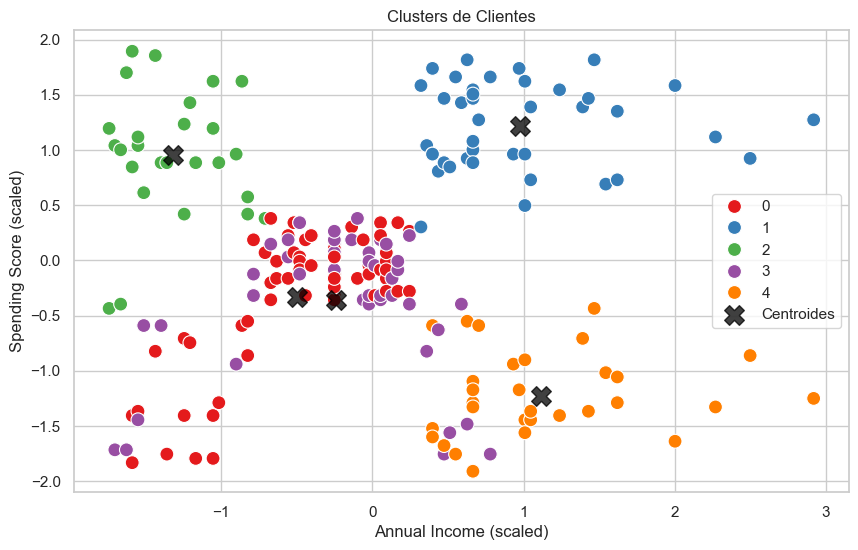

In [29]:
# visualización de los clusters en dos dimensiones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.75, marker='X', label='Centroides')
plt.title('Clusters de Clientes')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()
k = 3

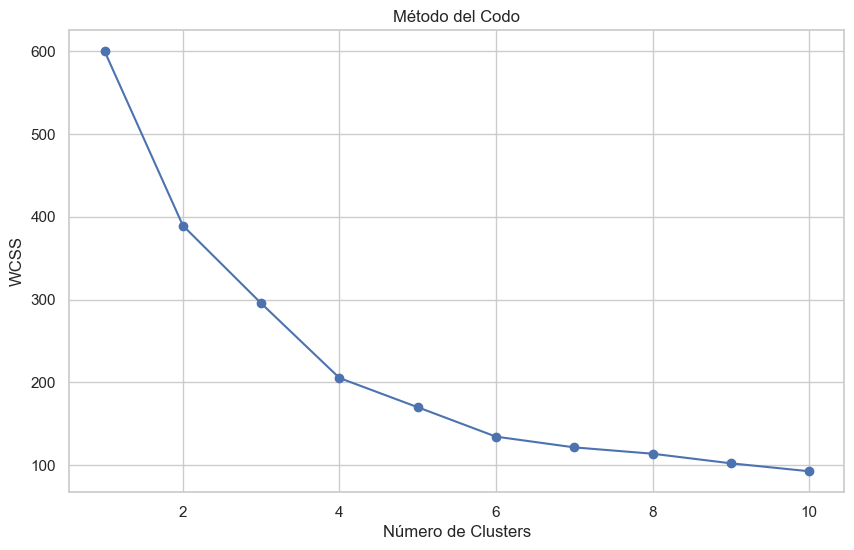

In [27]:
# graficar metodo del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


In [28]:
Se escoge K=3 basado en la gráfica del método del codo.


SyntaxError: invalid syntax (3520316230.py, line 1)

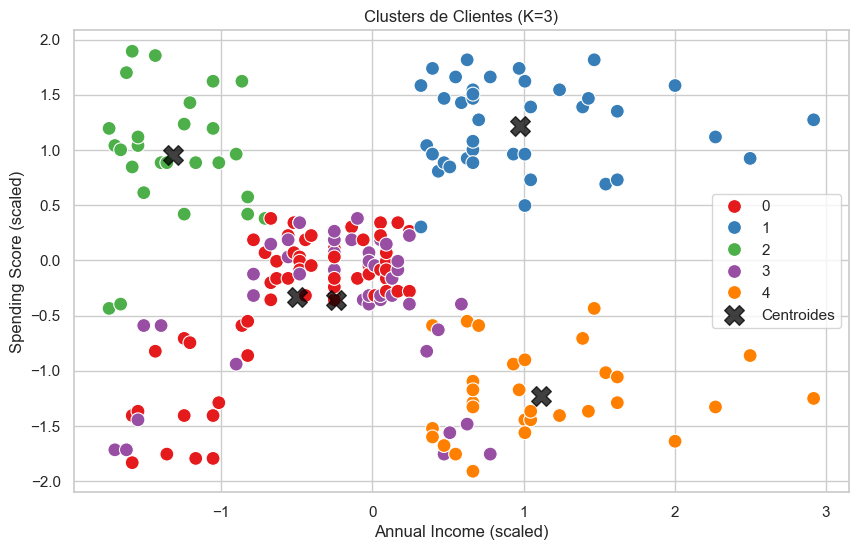

In [30]:
# vizualización de los clusters en dos dimensiones k=3
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.75, marker='X', label='Centroides')
plt.title('Clusters de Clientes (K=3)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

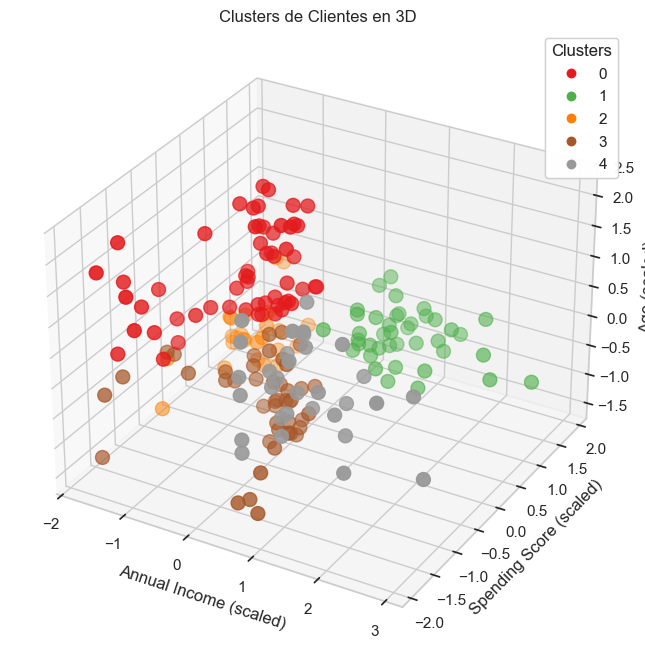

In [ ]:
# visualización de los clusters en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=df['Cluster'], cmap='Set1', s=100)
ax.set_title('Clusters de Clientes en 3D')
ax.set_xlabel('Annual Income (scaled)')
ax.set_ylabel('Spending Score (scaled)')
ax.set_zlabel('Age (scaled)')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()


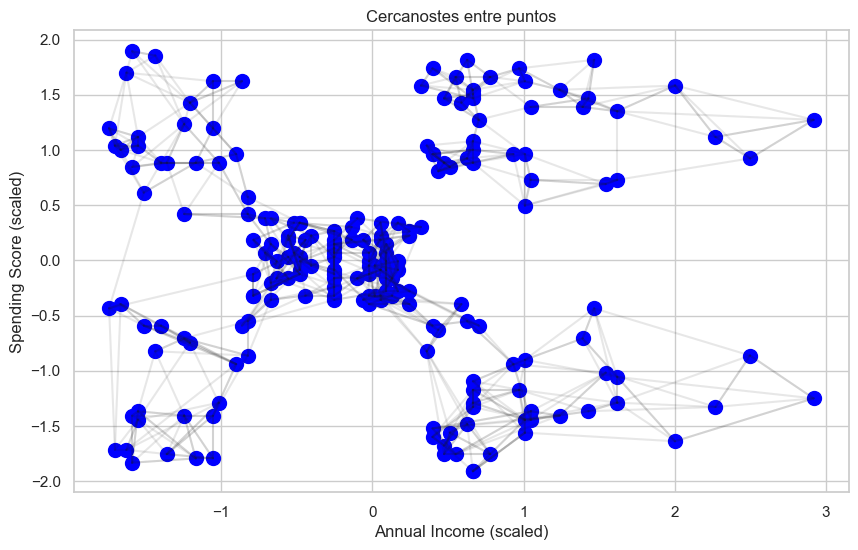

In [ ]:
# funcion para graficar cercanostes
def plot_nearest_neighbors(X, n_neighbors=5):
    from sklearn.neighbors import NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
    distances, indices = nbrs.kneighbors(X)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        for j in indices[i]:
            if i != j:
                plt.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]], 'k-', alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c='blue', s=100)
    plt.title('Cercanostes entre puntos')
    plt.xlabel('Annual Income (scaled)')
    plt.ylabel('Spending Score (scaled)')
    plt.show()
plot_nearest_neighbors(X_scaled, n_neighbors=5)

In [31]:
# distancia entre centroides
from scipy.spatial.distance import pdist, squareform
distances = pdist(centroids)
distance_matrix = squareform(distances)
print("Distancia entre centroides:\n", distance_matrix)


Distancia entre centroides:
 [[0.         2.67042518 2.61019459 2.06449075 2.00306416]
 [2.67042518 0.         2.35996914 2.03776665 2.58685062]
 [2.61019459 2.35996914 0.         1.702527   3.53227439]
 [2.06449075 2.03776665 1.702527   0.         2.04828357]
 [2.00306416 2.58685062 3.53227439 2.04828357 0.        ]]


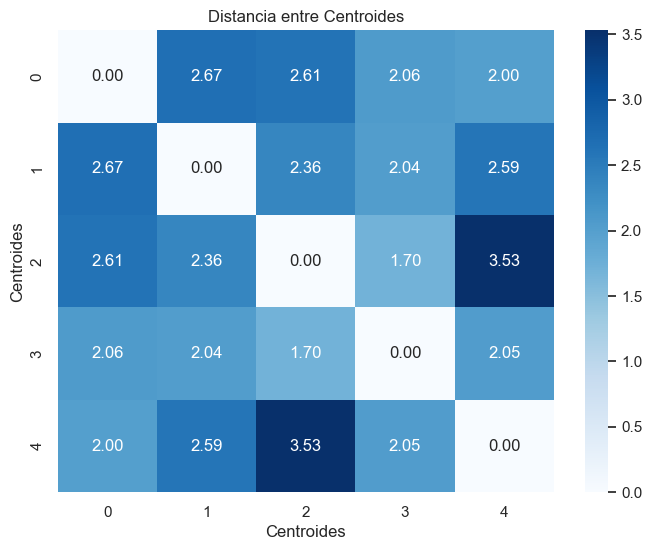

In [32]:
# grafica la distancia entre centroides
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Distancia entre Centroides')
plt.xlabel('Centroides')
plt.ylabel('Centroides')
plt.show()